In [1]:
'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning)
wrn.filterwarnings('ignore', category = FutureWarning)
wrn.filterwarnings('ignore', category = UserWarning)
'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
 display(Markdown(string))

In [48]:
bold('**Objective: To expose the best combination for strategy games available in the appstore in order to get a good user rating (4.0/5.0 and above) To analyse the dataset, we will look at the relationship as below:**')

**Objective: To expose the best combination for strategy games available in the appstore in order to get a good user rating (4.0/5.0 and above) To analyse the dataset, we will look at the relationship as below:**

In [18]:
'''Reading the data from csv files'''
df = pd.read_csv('C:\\Users\\srini\\Downloads\\MINOR PROJECT\\appstore_games.csv')
display(df.head())
print('Dimension of data:', df.shape)

,URL,ID,Name,Subtitle,Icon URL,User_Rating,User_Rating_Count,Price,In_App_Purchase,Description,Developer,Age_Rating,Languages,Size,Primary Genre,Genres,Release_Date,Current_Version_date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11-07-2008,30-05-2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11-07-2008,17-05-2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11-07-2008,05-09-2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23-07-2008,30-05-2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18-07-2008,22-07-2018


Dimension of data: (17007, 18)


In [3]:
'''Droping unwanted variable'''
df.drop(['URL', 'ID'], axis = 1, inplace = True)

In [32]:
bold('**Data Cleaning: 1.Genre tags "Entertainment" and "Games" are removed from the Genre string as it does not provide meaningful insight .......2.The remaining of the string are checked and grouped as follows:Puzzle= Puzzle/Board Adventure= Adventure/Role/Role Playing Action = Action Family = Family/Education**')

**Data Cleaning: 1.Genre tags "Entertainment" and "Games" are removed from the Genre string as it does not provide meaningful insight .......2.The remaining of the string are checked and grouped as follows:Puzzle= Puzzle/Board Adventure= Adventure/Role/Role Playing Action = Action Family = Family/Education**

In [41]:
df['Genres'] = df['Genres'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
df['Genres'] = df['Genres'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
df['Genres']=df['Genres'].str.strip()
Non_Main_Genres=df[~df.Genres.str.contains('Puzzle') & \
                           ~df.Genres.str.contains('Action') & \
                           ~df.Genres.str.contains('Family')& \
                           ~df.Genres.str.contains('Education')& \
                           ~df.Genres.str.contains('Family')& \
                           ~df.Genres.str.contains('Adventure')&\
                           ~df.Genres.str.contains('Board')&\
                           ~df.Genres.str.contains('Role')].index
df.drop(Non_Main_Genres , inplace=True)
df.loc[df['Genres'].str.contains('Puzzle'),'Genres'] = 'Puzzle'
df.loc[df['Genres'].str.contains('Board'),'Genres'] = 'Puzzle'
df.loc[df['Genres'].str.contains('Action'),'Genres'] = 'Action'
df.loc[df['Genres'].str.contains('Adventure'),'Genres'] = 'Adventure'
df.loc[df['Genres'].str.contains('Role'),'Genres'] = 'Adventure'
df.loc[df['Genres'].str.contains('Family'),'Genres'] = 'Family'
df.loc[df['Genres'].str.contains('Education'),'Genres'] = 'Family'

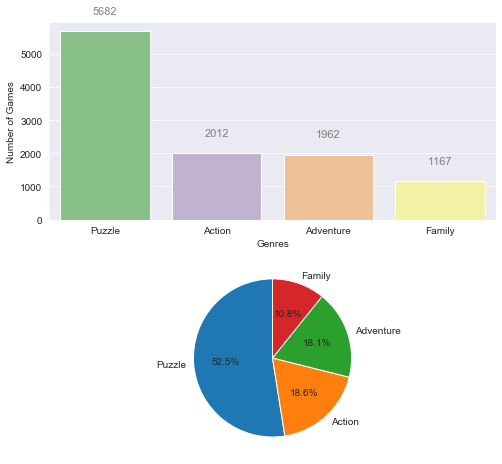

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
f, axes = plt.subplots (2,1, figsize=(8,8))

#Histogram
x=['Puzzle','Action','Adventure','Family']
y = [df.Genres[(df['Genres']=='Puzzle')].count(),df.Genres[(df['Genres']=='Action')].count(),\
     df.Genres[(df['Genres']=='Adventure')].count(),df.Genres[(df['Genres']=='Family')].count()]

vis1= sns.barplot(x,y,palette='Accent',ax=axes[0])
vis1.set(xlabel='Genres',ylabel='Number of Games')
for p in vis1.patches:
             vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')


#Pie Chart
NG = [df.Genres[(df['Genres']=='Puzzle')].count(),df.Genres[(df['Genres']=='Action')].count(),\
     df.Genres[(df['Genres']=='Adventure')].count(),df.Genres[(df['Genres']=='Family')].count()]
G = ['Puzzle','Action','Adventure','Family']

plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plt.show()


plt.ioff()



Simple Analysis on Genre distribution, we can see that number of games follows Puzzle > Adventure > Action > Family

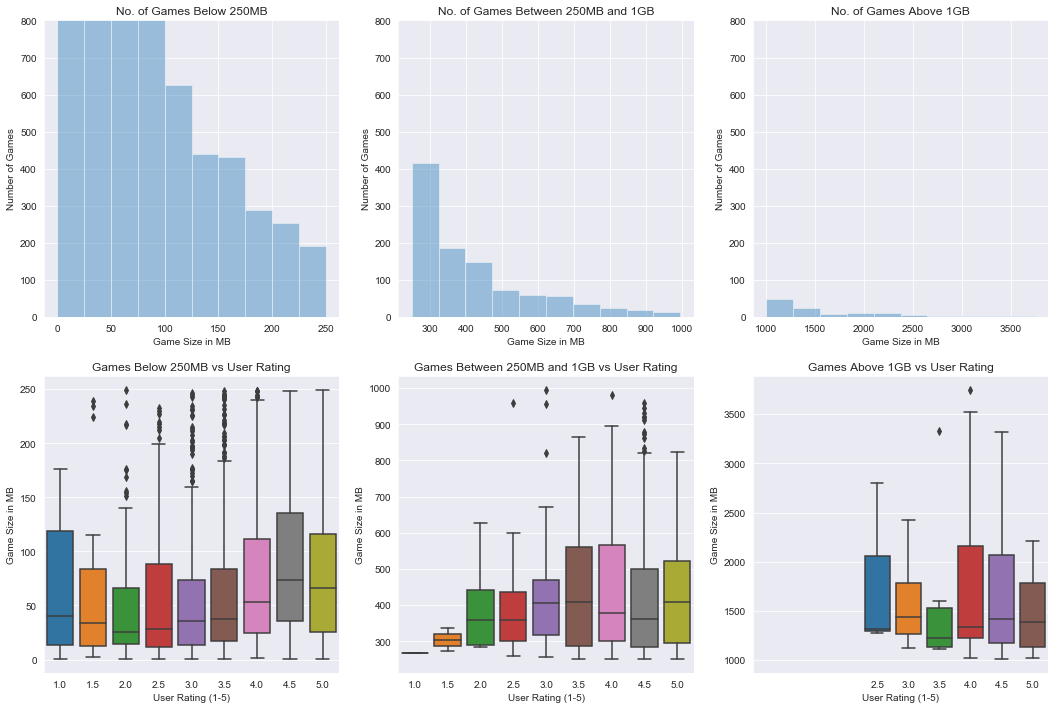

In [43]:
df['Size2'] = round(df['Size']/1000000,1)
Size_Less_250MB = df[df.Size2 <250]
Size_More_250MB = df[(df.Size2 >=250) & (df.Size2 <1000)]
Size_More_1GB = df[df.Size2 >=1000]


sns.set_style('darkgrid')
f, axes = plt.subplots (2,3, figsize=(18,12))



vis1 = sns.boxplot( data = Size_Less_250MB, x = 'User_Rating', y = 'Size2',  ax=axes[1,0])
vis2 = sns.boxplot( data = Size_More_250MB, x = 'User_Rating', y = 'Size2', ax=axes[1,1])
vis3 = sns.boxplot( data = Size_More_1GB, x = 'User_Rating', y = 'Size2', ax=axes[1,2],)
vis4 = sns.distplot(Size_Less_250MB.Size2, bins= 10, kde=False,ax=axes[0,0])
vis5 = sns.distplot(Size_More_250MB.Size2, bins= 10, kde=False,ax=axes[0,1])
vis6 = sns.distplot(Size_More_1GB.Size2, bins= 10, kde=False,ax=axes[0,2])

vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis2.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis3.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB') 
vis4.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis5.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis6.set(xlabel='Game Size in MB',ylabel='Number of Games')

axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')
vis3.set(xlim=(-4, 5.5))

vis4.set(ylim=(0, 800))
vis5.set(ylim=(0, 800))
vis6.set(ylim=(0, 800))

plt.ioff()

Size Factor

--From the visualization, we can see that most of the game are below 250MB In which to achieve score 4 and above it has to be 100MB and above.
--Second column of the chart shows that good games (score >4) have to be 600MB and above, with the exception
--A very small portion of games (less than 100 titles) are above 1GB, in which the minimum score for the game is 2.5 This might be due to the user sentiment who gives credit to the huge game content and possibly better game graphics.

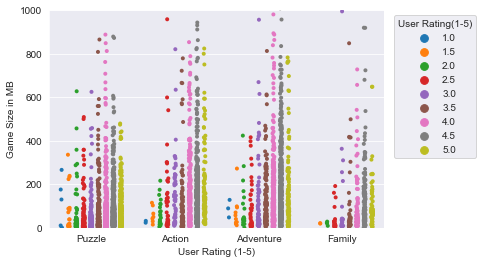

In [44]:
vis1= sns.stripplot(y='Size2' , x='Genres', data=df,\
                hue='User_Rating',dodge=True, size=4)

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))

vis1.set(ylim=(0, 1000))
vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
plt.ioff()

We can easily say that more than half of the games from these 4 genre gets a score of 4 and above, in which the majority focuses on size 400MB and below. With the exception of Action which still gets good rating up to 600MB, and Adventure game up to 800MB. Family (and education) genre has the least number of games in the store, and a 200MB size is sufficient to get score of 4.0 and above.

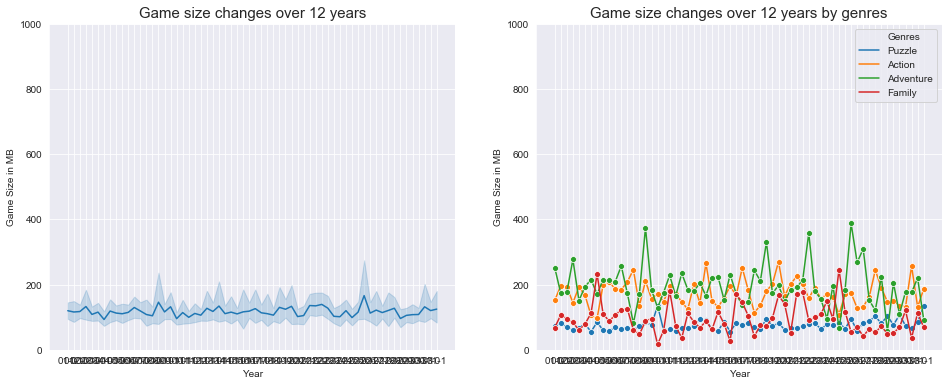

In [46]:
df['Year'] = df['Release_Date']
df['Year']=df['Year'].astype(str)
#extract year ony
for i in (list(df.index.values)):
    df['Year'][i]=df['Year'][i][:4]
    
g, axes = plt.subplots (1,2, figsize=(16,6))

vis1 = sns.lineplot(x=df.Year, y=df.Size2, data=df, ax=axes[0])
vis1.set(ylim=(0, 1000))
vis2 = sns.lineplot(x=df.Year, y=df.Size2, hue=df.Genres, err_style=None, marker='o',ax=axes[1])
vis2.set(ylim=(0, 1000))
plt.legend(bbox_to_anchor=(1, 1))

axes[0].set_title('Game size changes over 12 years',fontsize=15)
axes[1].set_title('Game size changes over 12 years by genres',fontsize=15)

vis1.set(xlabel='Year',ylabel='Game Size in MB')
vis2.set(xlabel='Year',ylabel='Game Size in MB')

plt.ioff()

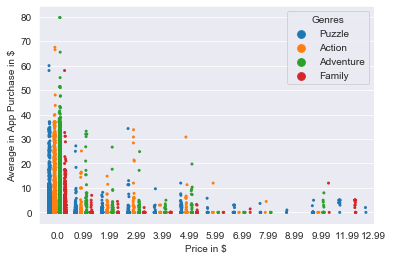

In [14]:
dff=df.copy()
import statistics
dff['In_App_Purchase'] = dff['In_App_Purchase'].str.replace(',', '') 
dff.In_App_Purchase=dff.In_App_Purchase.fillna(0)

for i in (list(dff.index.values)):
    if dff.In_App_Purchase[i] ==0:
        dff['In_App_Purchase'][i]=0.01
    elif dff.In_App_Purchase[i] !=0:
        A=str.split(dff.In_App_Purchase[i])
        A=[float(i) for i in A]
        dff['In_App_Purchase'][i]=statistics.mean(A)
vis1= sns.stripplot(y=dff.In_App_Purchase , x=dff.Price, data=dff, hue=dff.Genres, dodge=True, size=3)

vis1.set(xlabel='Price in $',ylabel='Average in App Purchase in $')
vis1.set(xlim=(-0.7, 12))
plt.ioff()

The pricier the game gets, the lower the In-App Purchase items are. This is expected as low price and free games needs to sustain with some form of income.

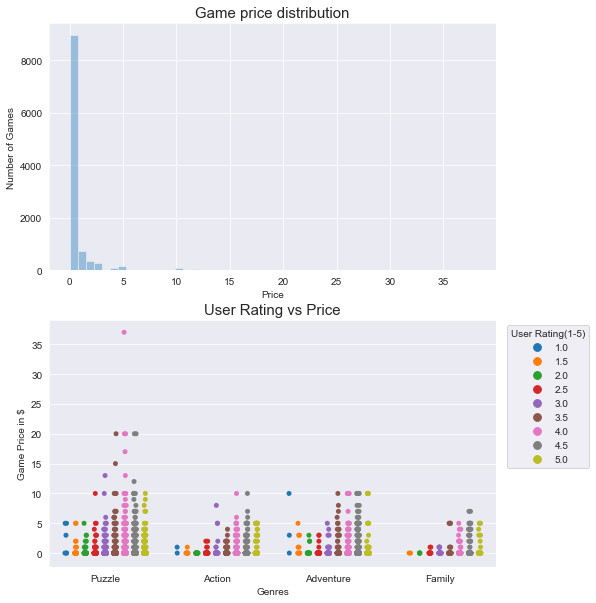

In [15]:
h, axes = plt.subplots (2,1, figsize=(8,10))

vis1 = sns.distplot(df.Price,kde=None,ax=axes[0])
vis2 = sns.stripplot(y=df.Price, x=df.Genres, data=df,ax=axes[1],hue=df.User_Rating, dodge=1)

vis1.set(xlabel='Price',ylabel='Number of Games')
vis2.set(xlabel='Genres',ylabel='Game Price in $')

axes[0].set_title('Game price distribution',fontsize=15)
axes[1].set_title('User Rating vs Price',fontsize=15)
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.22, 1))


The trend of user rating with respect to price becomes better as the game becomes pricier.

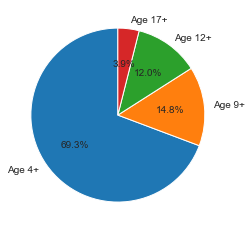

In [47]:
NAR = [df.Age_Rating[(df['Age_Rating']=='4+')].count(),df.Age_Rating[(df['Age_Rating']=='9+')].count(),\
     df.Age_Rating[(df['Age_Rating']=='12+')].count(),df.Age_Rating[(df['Age_Rating']=='17+')].count()]
AR = ['Age 4+','Age 9+','Age 12+','Age 17+']

plt.pie(NAR, labels=AR, startangle=90, autopct='%.1f%%')
plt.show()


Inference made:

1.For simpler games, focus on size between 100MB to 150MB of contents
2.For more complex games, target a content of 500MB and above
3.Games above 1GB have good tendancy to land above 3 score and above, provided sufficient resource available to the developer
4.Puzzle games are less saturated above 400MB to achieve score 4.0 and above
5.Action & Adventure Genre games are less saturated above 600MB to achieve score 4.0 and above
6.Family/Educational games has less competition overall
7.Almost 90% of the developers focuses on games below 1 Dollar and places In-App Purchase as their strategy for income
8.Puzzle and Family games requires less game updates on average.
9.Paid Games tend to have better reviews espeicially those above 9 Dollar scores 4.0 User Rating
10.Consumers enjoy more matured content i.e games targetted for 17+ age and above